In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing Requisite Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [ ]:
import tensorflow
from tensorflow import keras
from keras.models import  Sequential
from keras.layers import Dense, Dropout


Loading the dataset

In [ ]:
df = pd.read_csv(r"/content/9.random.csv", header = None)

In [ ]:
df.head()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


Plotting the datapoints to identify shape

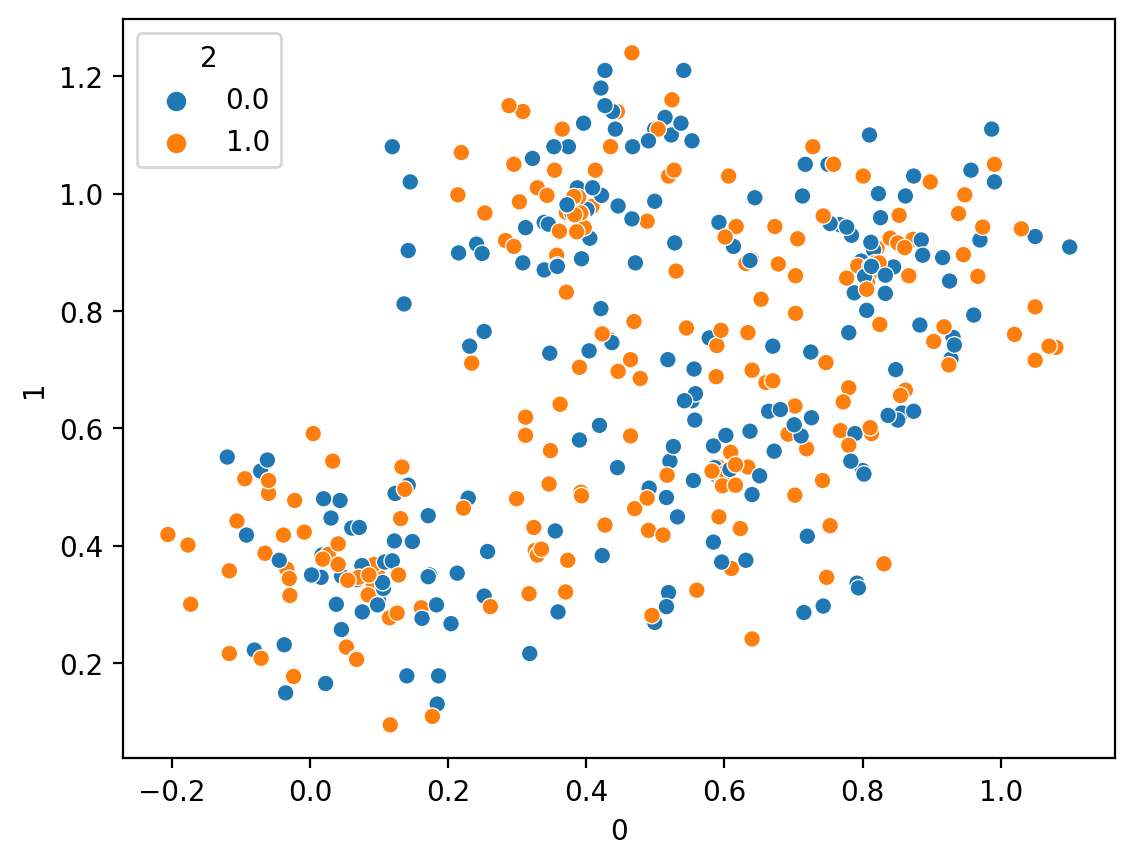

In [ ]:
sns.scatterplot(x = 0,y=1, hue = 2, data = df);

Performing train test split and Building MLP

In [ ]:
X = df[[0,1]]
y=df[2]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_trans=std.fit_transform(X_train)

In [ ]:
X_test_trans = std.transform(X_test)

In [ ]:
model = Sequential()
model.add(Dense(10,activation='relu', input_dim = 2))
model.add(Dropout(0.2))
model.add(Dense(8,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(6,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='relu',kernel_initializer = "he_normal"))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_231 (Dense)           (None, 10)                30        
                                                                 
 dropout_62 (Dropout)        (None, 10)                0         
                                                                 
 dense_232 (Dense)           (None, 8)                 88        
                                                                 
 dropout_63 (Dropout)        (None, 8)                 0         
                                                                 
 dense_233 (Dense)           (None, 6)                 54        
                                                                 
 dropout_64 (Dropout)        (None, 6)                 0         
                                                                 
 dense_234 (Dense)           (None, 4)               

Model Compilation and Training

In [ ]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_trans,y_train,epochs = 397 ,validation_split = 0.2 )

Epoch 1/397
8/8 [==============================] - 1s 24ms/step - loss: 0.7041 - accuracy: 0.5156 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 2/397
8/8 [==============================] - 0s 5ms/step - loss: 0.7011 - accuracy: 0.4609 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 3/397
8/8 [==============================] - 0s 5ms/step - loss: 0.7054 - accuracy: 0.4805 - val_loss: 0.6931 - val_accuracy: 0.4688
Epoch 4/397
8/8 [==============================] - 0s 5ms/step - loss: 0.7028 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.4844
Epoch 5/397
8/8 [==============================] - 0s 5ms/step - loss: 0.7039 - accuracy: 0.4062 - val_loss: 0.6934 - val_accuracy: 0.4531
Epoch 6/397
8/8 [==============================] - 0s 5ms/step - loss: 0.6990 - accuracy: 0.5312 - val_loss: 0.6935 - val_accuracy: 0.4375
Epoch 7/397
8/8 [==============================] - 0s 9ms/step - loss: 0.6997 - accuracy: 0.4883 - val_loss: 0.6935 - val_accuracy: 0.4531
Epoch 8/397
8/8 [=========

MLP Evaluation and Plotting decision surfaces

In [ ]:
Y_cap = model.predict(X_test_trans)


3/3 [==============================] - 0s 3ms/step


In [ ]:
Y_cap_f = np.where(Y_cap>0.5,1,0)

In [ ]:
Y_cap_f

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,Y_cap_f)

0.45

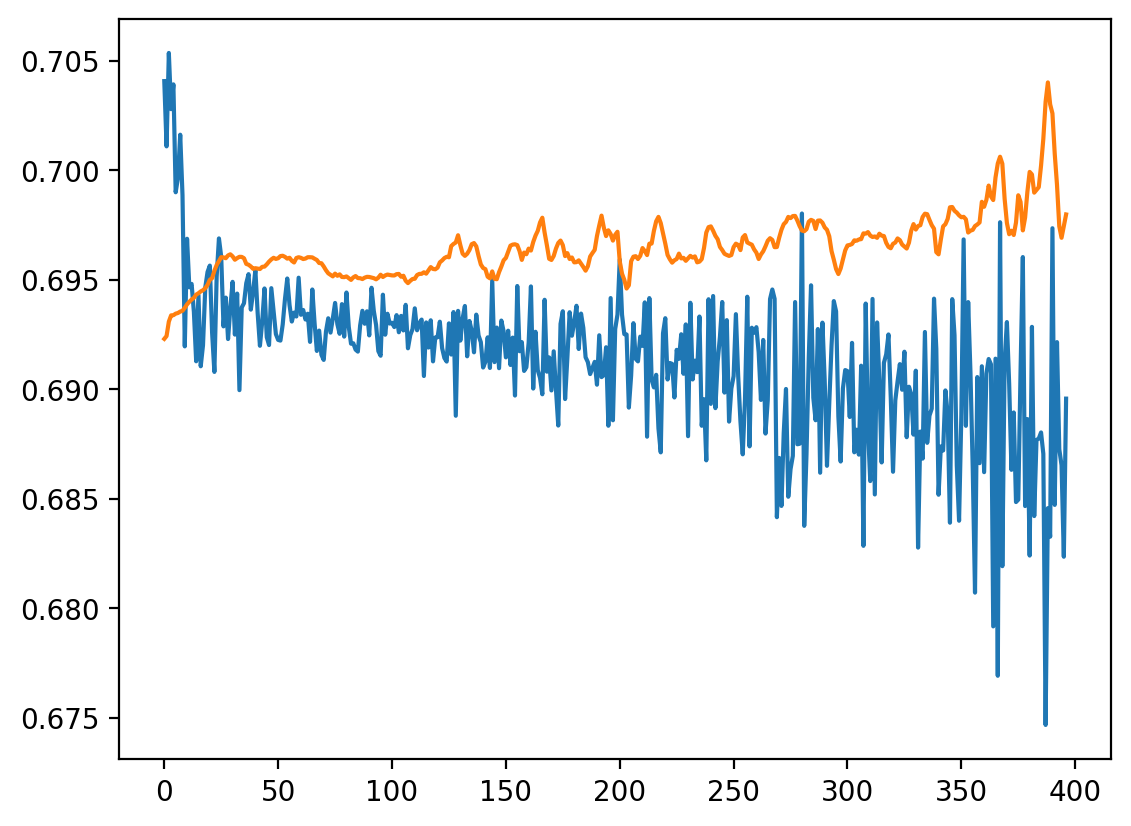

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [ ]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 9s 918us/step


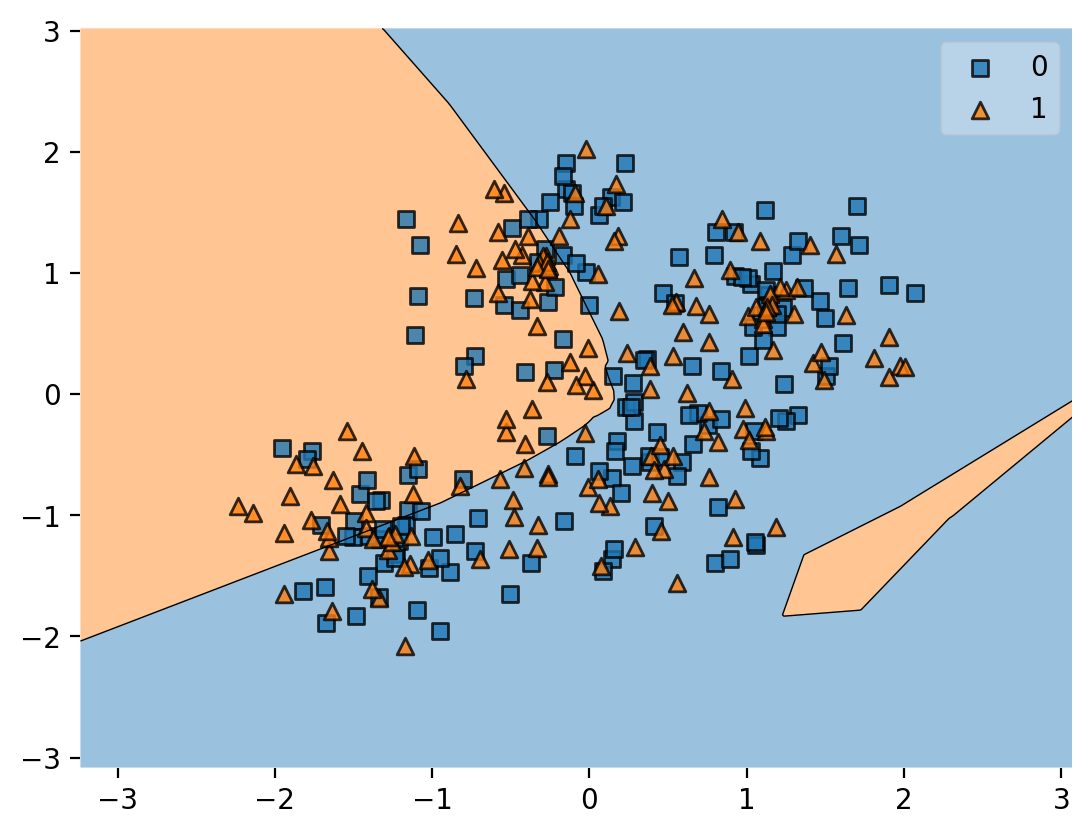

In [ ]:
plot_decision_regions(X_train_trans, y_train.values.astype(int), clf = model);

9600/9600 [==============================] - 10s 994us/step


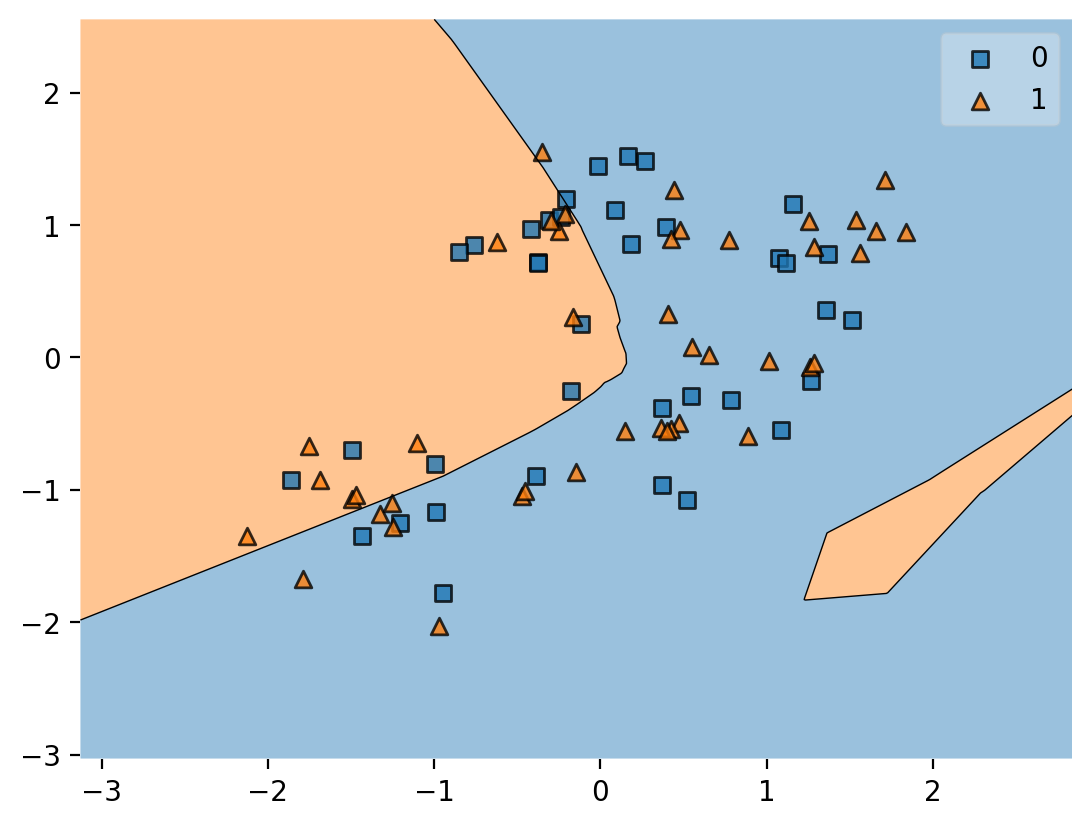

In [ ]:
plot_decision_regions(X_test_trans, y_test.values.astype(int), clf = model);